In [1]:
# find Stopwords for Hinglish- remove min_df,max_df
# Try compressing the songs first and then pass to word2vec
# Trends in songs over the years
# Find topics on which songs are focused
# explaination of window size
# mood sentiment
# LDA - separate by regional/language and analysis 
# song data before 10 years
# YEAR WISE vocabulary CHANGE/ style analysis/ avg word length/ repetitive
# parents bias
# more type of biases
# toxic language used in recent songs
# gender distribution in sound track --In future we plan to use audio based gender detection to further quantify this.
# screen time
#

!pip install wordcloud

You are using pip version 18.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Gender Bias 
1. words frequency/ TF-IDF 
2. word2vec similarity / knowledge graph
3. year wise 
--4. fastText

In [1]:
import pandas as pd
import numpy as np
import nltk
import gensim 
from gensim.models.phrases import Phrases, Phraser
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import Counter 

In [2]:
data=pd.read_csv("data")

In [3]:
data.shape

(3027, 6)

In [4]:
data.head()

,movieName,songName,songSinger,songMusic,songLyricist,songLyrics
0,Bala,Don’t Be Shy,"Badshah, Shalmali Kholgade, Gurdeep Mehendi",Sachin-Jigar,"Mellow D, Badshah","Sun, main hoon thoda sanki\r\nKarun mann ki\r\..."
1,Laal Kaptaan,Lahu Ka Rang Kara,Samira Koppikar,Samira Koppikar,Sahib,Morey.. lahu ka rang kara\r\nMorey lahu ka ran...
2,Laal Kaptaan,Red Red Najariya,Shreya Ghoshal,Samira Koppikar,Saurabh Jain,"Badnaam shehar, badnaam gully\r\nIsme har raat..."
3,Laal Kaptaan,Kaal Kaal,"Brijesh Shandilya, Dino James",Samira Koppikar,Saurabh Jain,"Kaal kaal, kaal kaal, jo sapaat chal raha\r\nW..."
4,Laal Kaptaan,Taandav,"Kailash Kher, Brijesh Shandilya",Samira Koppikar,Puneet Sharma,Shor hai andher mein\r\nJo dher murda pedon ka...


In [5]:
# data['songLyrics'][0]

In [6]:
doc=[]
for i in range(data.shape[0]):
    doc.append(nltk.word_tokenize(re.sub('[^a-zA-z\s]','',data['songLyrics'][i].lower())))

In [8]:
doc[1]

['morey',
 'lahu',
 'ka',
 'rang',
 'kara',
 'morey',
 'lahu',
 'ka',
 'rang',
 'kara',
 'morey',
 'lahu',
 'ka',
 'rang',
 'kara',
 'morey',
 'lahu',
 'ka',
 'rang',
 'kara',
 'kaare',
 'badarwa',
 'manwa',
 'mein',
 'ghoome',
 'kaare',
 'bhujanga',
 'sapno',
 'mein',
 'jhoome',
 'ghole',
 'zehar',
 'ki',
 'ye',
 'dhaara',
 'morey',
 'lahu',
 'ka',
 'rang',
 'kara',
 'morey',
 'lahu',
 'ka',
 'rang',
 'kara',
 'lahu',
 'ka',
 'rang',
 'kaara',
 'katit',
 'kaadank',
 'kapat',
 'kalank',
 'maathe',
 'mandha',
 'koi',
 'shraap',
 'hai',
 'jeevan',
 'raja',
 'ho',
 'ya',
 'rank',
 'kabila',
 'ya',
 'jhund',
 'har',
 'praan',
 'ka',
 'hi',
 'lakshya',
 'hai',
 'maran',
 'jeetna',
 'hai',
 'jo',
 'ye',
 'rann',
 'kar',
 'bairi',
 'ka',
 'daman',
 'warna',
 'mile',
 'na',
 'chhutkaara',
 'morey',
 'lahu',
 'ka',
 'rang',
 'kara',
 'morey',
 'lahu',
 'ka',
 'rang',
 'kara',
 'morey',
 'lahu',
 'ka',
 'rang',
 'kara',
 'morey',
 'lahu',
 'ka',
 'rang',
 'kaara',
 'lahu',
 'ka',
 'kaara',
 'aa'

# Bag of words approach

In [35]:
strr=""
for i in doc:
    for j in i:
        strr=strr+' '+ j

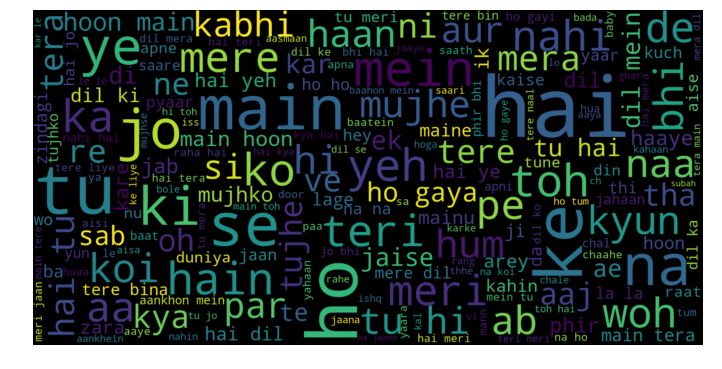

In [14]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(strr)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [12]:
train=[]
for i in doc:
    srr=""
    for j in i:
        srr=srr+' '+j
    train.append(srr)
    

In [13]:
train

[' sun main hoon thoda sanki karun mann ki baby gaana lagade thoda funky nahi mann ki nahi dhan ki ye baat hai tere tann ki paagal ho jaaun jab tu ho rubaru na lamba ocha gora chitta phir bhi dil mein tu ishq ne tere kiya hai bekaboo jaisa hai waisa hi pasand mujhko tu jaanu i just wan na feel your body saanu kare ishaare touch my body dont be shy my honey saanu kare ishaare i wan na feel your body saanu kare ishaare touch my body dont be shy my honey saanu kare ishaare touch my body fly my honey dont be shy my honey befikar fly my honey dont be shy my honey sun main hoon thoda sanki karun mann ki baby gaana lagade thoda funky nahi mann ki nahi dhan ki ye baat hai tere tann ki kuch bhi bole bina aankhon se tu baat kare ye shaitani jaan bujhke mere saath kare tujhko dekhe bina dil mera ab kahin lage nahi tere husn pe aankhein sek sek kar thake nahi upar se raat hoti ja rahi hai naughty naughty naughty dont be shy my honey i wan na feel your body saanu kare ishaare touch my body dont be 

In [14]:
count_vec=CountVectorizer(max_features=10000,ngram_range=(1,1),min_df=0.01)
features=count_vec.fit_transform(train)

In [15]:
len(count_vec.get_feature_names())

1091

In [16]:
count_vec.get_feature_names()[:10]

['aa', 'aadat', 'aadha', 'aadhi', 'aag', 'aage', 'aah', 'aaj', 'aaja', 'aake']

In [61]:
#also find most frequent words yearwise
from collections import Counter 
  
split_it = strr.split()
  
Counter = Counter(split_it)
most_occur = Counter.most_common(500) 
most_occur

[('hai', 16539),
 ('tu', 8294),
 ('main', 7020),
 ('mein', 7020),
 ('ho', 6684),
 ('na', 6632),
 ('ke', 6610),
 ('se', 5665),
 ('ki', 5224),
 ('dil', 5154),
 ('tere', 4336),
 ('de', 4046),
 ('bhi', 3531),
 ('teri', 3491),
 ('jo', 3375),
 ('meri', 3321),
 ('mere', 3164),
 ('hi', 3120),
 ('ka', 3104),
 ('re', 3100),
 ('o', 2919),
 ('mera', 2909),
 ('ye', 2882),
 ('tera', 2777),
 ('toh', 2757),
 ('pe', 2579),
 ('hain', 2537),
 ('ko', 2519),
 ('le', 2510),
 ('nahi', 2422),
 ('yeh', 2274),
 ('hoon', 2104),
 ('aa', 2082),
 ('kya', 2041),
 ('ni', 1933),
 ('kar', 1862),
 ('koi', 1769),
 ('hum', 1743),
 ('to', 1692),
 ('gaya', 1593),
 ('you', 1558),
 ('ne', 1496),
 ('di', 1463),
 ('ab', 1447),
 ('kyun', 1417),
 ('ve', 1407),
 ('ishq', 1389),
 ('do', 1374),
 ('me', 1353),
 ('tum', 1350),
 ('har', 1329),
 ('woh', 1314),
 ('ek', 1279),
 ('ae', 1263),
 ('da', 1262),
 ('si', 1240),
 ('mujhe', 1222),
 ('gayi', 1214),
 ('naa', 1198),
 ('phir', 1197),
 ('the', 1137),
 ('aur', 1134),
 ('haan', 1133),
 (

In [71]:
# if "hai" in count_vec.get_feature_names():
#     print("y")

y


In [60]:
# sw=count_vec.get_stop_words()

In [61]:
# sw


In [62]:
# data['songLyrics'][90].split("\n")

In [63]:
# nonrep_doc[90]

# TF-IDF

In [22]:
tvec = TfidfVectorizer(max_features=50000, ngram_range=(1,3))
featuress=tvec.fit_transform(train)



In [65]:
# tvec.get_feature_names()

# Word2vec

In [66]:
# build vocabulary and train model
w2v_model = gensim.models.Word2Vec(doc,size=300,window=15,min_count=2,workers=10,iter=10) 

In [67]:
w2v_model.wv.most_similar(positive=["ladki"],topn=30)

[('bolti', 0.7869465351104736),
 ('sanwali', 0.7692834138870239),
 ('pagli', 0.7527889609336853),
 ('mastani', 0.741225004196167),
 ('bhadki', 0.739926815032959),
 ('hirni', 0.7377734780311584),
 ('bholi', 0.725879430770874),
 ('chull', 0.7206646203994751),
 ('hasina', 0.7156018018722534),
 ('nakhrezi', 0.7150251865386963),
 ('tikhi', 0.7117122411727905),
 ('tabiyat', 0.7025429010391235),
 ('wooo', 0.7024431824684143),
 ('uski', 0.7015777826309204),
 ('komalkomal', 0.6902417540550232),
 ('start', 0.690086841583252),
 ('shaamat', 0.6863834857940674),
 ('kharaab', 0.6858870983123779),
 ('buddhi', 0.6798598170280457),
 ('goron', 0.6796847581863403),
 ('sharaab', 0.6772248148918152),
 ('masti', 0.6763511300086975),
 ('ladka', 0.6756604313850403),
 ('thenga', 0.6745092868804932),
 ('marey', 0.672173261642456),
 ('jodon', 0.668488085269928),
 ('lagti', 0.6679468750953674),
 ('seedhisaadi', 0.6665102243423462),
 ('roothi', 0.6638109683990479),
 ('naadaan', 0.6631407737731934)]

In [132]:
w2v_model.wv.most_similar(positive=["maa"])

[('sehmasehma', 0.7052578330039978),
 ('aanchal', 0.7014696002006531),
 ('pet', 0.6899479031562805),
 ('bachpane', 0.672627329826355),
 ('khedaaya', 0.6389012336730957),
 ('fauji', 0.637405276298523),
 ('naachna', 0.6293826103210449),
 ('jes', 0.6278321743011475),
 ('iski', 0.6205286979675293),
 ('perplex', 0.615810751914978)]

In [140]:
w2v_model.wv.most_similar(positive=["baap","papa"])

[('aadmi', 0.7903940677642822),
 ('footpath', 0.7732025384902954),
 ('logon', 0.7716996669769287),
 ('bigdey', 0.7529458999633789),
 ('lafdebaz', 0.7528111934661865),
 ('generation', 0.7465031147003174),
 ('bajaye', 0.7437002658843994),
 ('mehnat', 0.7420772314071655),
 ('afsar', 0.740239679813385),
 ('dhakka', 0.7398467659950256)]

In [145]:
w2v_model.wv.most_similar(positive=["mom"])

[('nishaani', 0.8906590938568115),
 ('revolver', 0.8546709418296814),
 ('moda', 0.8322488069534302),
 ('mausi', 0.8106378316879272),
 ('large', 0.8095601797103882),
 ('jhoomega', 0.8059307336807251),
 ('thaayn', 0.8032423257827759),
 ('munni', 0.7975975275039673),
 ('jhanak', 0.7938730120658875),
 ('anklet', 0.7856358289718628)]

In [71]:
w2v_model.wv.most_similar(positive="disco")

[('khisko', 0.8063634634017944),
 ('nasheelee', 0.781376838684082),
 ('tamanche', 0.7709103226661682),
 ('aahaan', 0.7449934482574463),
 ('nachega', 0.7364885807037354),
 ('likes', 0.731094241142273),
 ('taang', 0.7283221483230591),
 ('nakad', 0.7263575196266174),
 ('floor', 0.7262365221977234),
 ('aathe', 0.7203644514083862)]

In [72]:
w2v_model.wv.most_similar(positive="dil")

[('dhadke', 0.5981246829032898),
 ('humnavaa', 0.5674633979797363),
 ('maila', 0.552955150604248),
 ('bekarari', 0.545580267906189),
 ('bechara', 0.542143702507019),
 ('sifarisho', 0.532382071018219),
 ('badmash', 0.5205579400062561),
 ('banjara', 0.5111619234085083),
 ('khatara', 0.510837197303772),
 ('dhadkan', 0.4987128674983978)]

In [136]:
w2v_model.wv.similarity(w1="maa",w2="baap")

0.5783114268320562

In [74]:
# model.wv.vocab

In [84]:
ctr=0
for i in range(len(doc)):
    if "dil" in doc[i]:
        ctr+=1
ctr

1574

In [88]:
ctr=0
for i in range(len(doc)):
    if "bhadki" in doc[i]:
        ctr+=1
ctr

7

In [75]:
# word_freq = defaultdict(int)
# for i in doc:
#     for j in i:
#         word_freq[j] += 1
# len(word_freq)

In [76]:
# sorted(word_freq, key=word_freq.get, reverse=True)[:10]

In [77]:
# w2v_model = gensim.models.Word2Vec(min_count=20,
#                      window=2,
#                      size=300,
#                      sample=6e-5, 
#                      alpha=0.03, 
#                      min_alpha=0.0007, 
#                      negative=20,)
# w2v_model.build_vocab(doc)

In [78]:
# w2v_model.train(doc, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

In [79]:
# w2v_model.wv.most_similar(positive=["ladki"],topn=30)

In [80]:
# w2v_model.wv.doesnt_match(['ladki', 'munda', 'girl'])

In [81]:
# t-SNE Visualization 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# Our goal in this section is to plot our 300 dimensions vectors into 2 dimensional graphs, and see if we can spot interesting patterns.
# For that we are going to use t-SNE implementation from scikit-learn.

In [82]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    plt.show()
    
# To make the visualizations more relevant, we will look at the relationships between a query 
# word (in **red**), its most similar words in the model (in **blue**), 
# and other words from the vocabulary (in **green**).


    

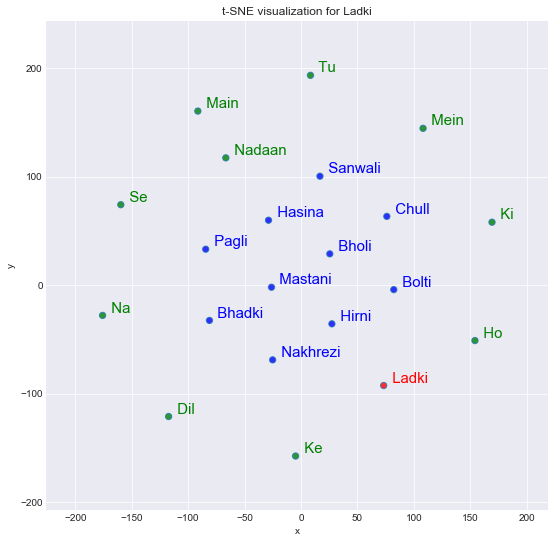

In [83]:
tsnescatterplot(w2v_model, 'ladki', ['nadaan', 'tu', 'main', 'mein', 'ho', 'na', 'ke', 'se', 'ki', 'dil'])

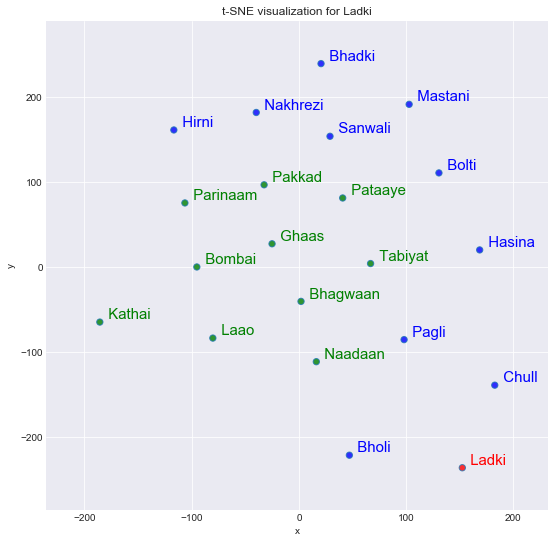

In [84]:
tsnescatterplot(w2v_model, 'ladki', [i[0] for i in w2v_model.wv.most_similar(positive=["ladka"])])

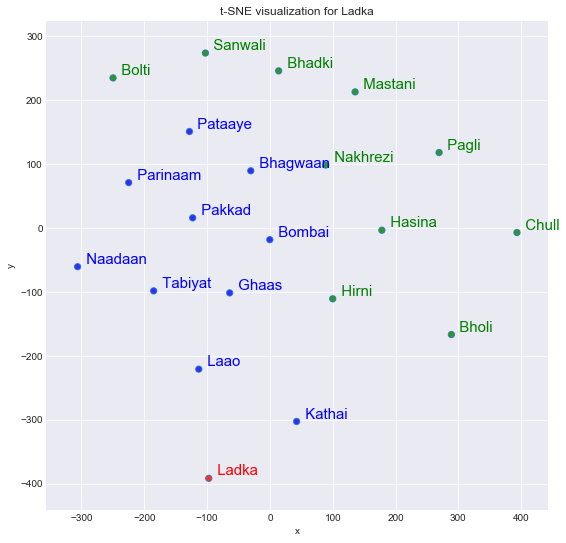

In [85]:
tsnescatterplot(w2v_model, 'ladka', [i[0] for i in w2v_model.wv.most_similar(positive=["ladki"])])

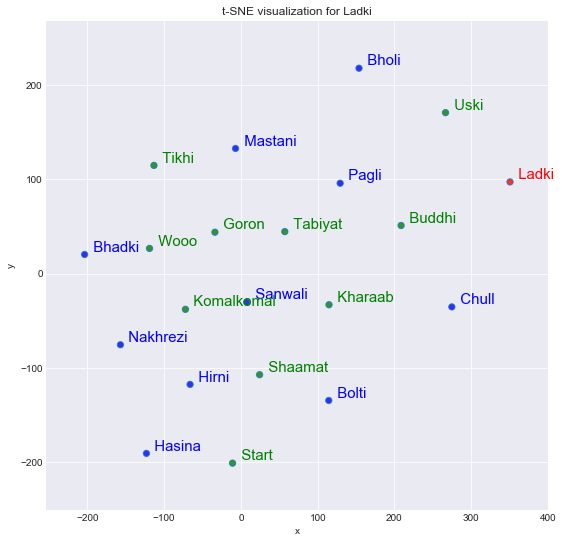

In [86]:
tsnescatterplot(w2v_model, "ladki", [t[0] for t in w2v_model.wv.most_similar(positive=["ladki"], topn=20)][10:])

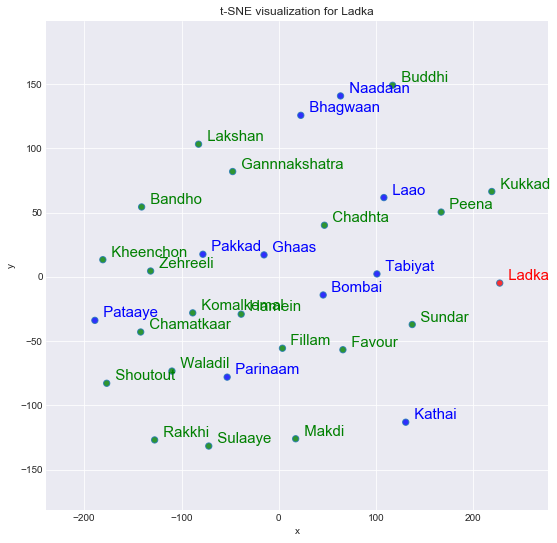

In [87]:
tsnescatterplot(w2v_model, "ladka", [t[0] for t in w2v_model.wv.most_similar(positive=["ladka"], topn=30)][10:])

# non repeating lines

In [88]:
# sentence tokenize

doc_sent=[]
for i in range(data.shape[0]):
    doc_sent.append(re.sub('[^a-zA-z\s]','',data['songLyrics'][i].lower()).split("\n"))
nonrep_doc=[]
for song in doc_sent:
    d=[]
    for line in song:
        if line not in d:
            d.append(line)
    nonrep_doc.append(d)
        

In [99]:
nonrep_doc[0]

['sun main hoon thoda sanki',
 'karun mann ki',
 'baby gaana lagade thoda funky',
 'nahi mann ki',
 'nahi dhan ki',
 'ye baat hai tere tann ki',
 '',
 'paagal ho jaaun jab tu ho rubaru',
 'na lamba ocha gora chitta',
 'phir bhi dil mein tu',
 'ishq ne tere kiya hai bekaboo',
 'jaisa hai waisa hi pasand mujhko tu jaanu',
 'i just wanna feel your body',
 'saanu kare ishaare',
 'touch my body',
 'dont be shy my honey',
 'i wanna feel your body',
 'fly my honey',
 'befikar fly my honey',
 'kuch bhi bole bina',
 'aankhon se tu baat kare',
 'ye shaitani jaan bujhke mere saath kare',
 'tujhko dekhe bina dil mera ab kahin lage nahi',
 'tere husn pe aankhein sek sek kar thake nahi',
 'upar se raat hoti ja rahi hai naughty naughty naughty']

In [100]:
doc1=[]
for i in range(data.shape[0]):
    doc1.append(nltk.word_tokenize(" ".join(nonrep_doc[i])))

In [102]:
doc1[0]

['sun',
 'main',
 'hoon',
 'thoda',
 'sanki',
 'karun',
 'mann',
 'ki',
 'baby',
 'gaana',
 'lagade',
 'thoda',
 'funky',
 'nahi',
 'mann',
 'ki',
 'nahi',
 'dhan',
 'ki',
 'ye',
 'baat',
 'hai',
 'tere',
 'tann',
 'ki',
 'paagal',
 'ho',
 'jaaun',
 'jab',
 'tu',
 'ho',
 'rubaru',
 'na',
 'lamba',
 'ocha',
 'gora',
 'chitta',
 'phir',
 'bhi',
 'dil',
 'mein',
 'tu',
 'ishq',
 'ne',
 'tere',
 'kiya',
 'hai',
 'bekaboo',
 'jaisa',
 'hai',
 'waisa',
 'hi',
 'pasand',
 'mujhko',
 'tu',
 'jaanu',
 'i',
 'just',
 'wan',
 'na',
 'feel',
 'your',
 'body',
 'saanu',
 'kare',
 'ishaare',
 'touch',
 'my',
 'body',
 'dont',
 'be',
 'shy',
 'my',
 'honey',
 'i',
 'wan',
 'na',
 'feel',
 'your',
 'body',
 'fly',
 'my',
 'honey',
 'befikar',
 'fly',
 'my',
 'honey',
 'kuch',
 'bhi',
 'bole',
 'bina',
 'aankhon',
 'se',
 'tu',
 'baat',
 'kare',
 'ye',
 'shaitani',
 'jaan',
 'bujhke',
 'mere',
 'saath',
 'kare',
 'tujhko',
 'dekhe',
 'bina',
 'dil',
 'mera',
 'ab',
 'kahin',
 'lage',
 'nahi',
 'tere',


In [101]:
strr=""
for i in doc1:
    for j in i:
        strr=strr+' '+ j

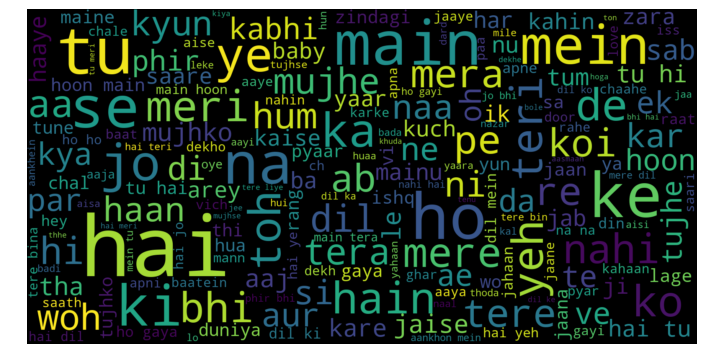

In [103]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(strr)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [104]:
doc1[0]

['sun',
 'main',
 'hoon',
 'thoda',
 'sanki',
 'karun',
 'mann',
 'ki',
 'baby',
 'gaana',
 'lagade',
 'thoda',
 'funky',
 'nahi',
 'mann',
 'ki',
 'nahi',
 'dhan',
 'ki',
 'ye',
 'baat',
 'hai',
 'tere',
 'tann',
 'ki',
 'paagal',
 'ho',
 'jaaun',
 'jab',
 'tu',
 'ho',
 'rubaru',
 'na',
 'lamba',
 'ocha',
 'gora',
 'chitta',
 'phir',
 'bhi',
 'dil',
 'mein',
 'tu',
 'ishq',
 'ne',
 'tere',
 'kiya',
 'hai',
 'bekaboo',
 'jaisa',
 'hai',
 'waisa',
 'hi',
 'pasand',
 'mujhko',
 'tu',
 'jaanu',
 'i',
 'just',
 'wan',
 'na',
 'feel',
 'your',
 'body',
 'saanu',
 'kare',
 'ishaare',
 'touch',
 'my',
 'body',
 'dont',
 'be',
 'shy',
 'my',
 'honey',
 'i',
 'wan',
 'na',
 'feel',
 'your',
 'body',
 'fly',
 'my',
 'honey',
 'befikar',
 'fly',
 'my',
 'honey',
 'kuch',
 'bhi',
 'bole',
 'bina',
 'aankhon',
 'se',
 'tu',
 'baat',
 'kare',
 'ye',
 'shaitani',
 'jaan',
 'bujhke',
 'mere',
 'saath',
 'kare',
 'tujhko',
 'dekhe',
 'bina',
 'dil',
 'mera',
 'ab',
 'kahin',
 'lage',
 'nahi',
 'tere',


In [111]:
w2v_model1 = gensim.models.Word2Vec(doc1,size=300,window=8,min_count=2,workers=10,iter=10) 

In [114]:
w2v_model1.wv.most_similar(positive=["girl"],topn=30)

[('higher', 0.9585093259811401),
 ('youll', 0.950705885887146),
 ('hold', 0.9486064910888672),
 ('look', 0.9479901790618896),
 ('too', 0.9463715553283691),
 ('im', 0.9446768760681152),
 ('kiss', 0.9422286152839661),
 ('everytime', 0.9422239065170288),
 ('let', 0.9397181272506714),
 ('come', 0.9392727613449097),
 ('movesem', 0.9390348196029663),
 ('boy', 0.9348319172859192),
 ('my', 0.9342638254165649),
 ('crazy', 0.9318591356277466),
 ('mind', 0.9304534196853638),
 ('pie', 0.9296314716339111),
 ('mine', 0.9284729957580566),
 ('youre', 0.9276267886161804),
 ('chammak', 0.9268221259117126),
 ('much', 0.9267569780349731),
 ('missing', 0.9263575077056885),
 ('just', 0.9233479499816895),
 ('tadpaau', 0.9219708442687988),
 ('want', 0.9218133687973022),
 ('ready', 0.921485424041748),
 ('only', 0.9206862449645996),
 ('benz', 0.9204388856887817),
 ('meet', 0.9203246831893921),
 ('your', 0.9202185273170471),
 ('driving', 0.9193532466888428)]

In [126]:
w2v_model1.wv.most_similar(negative=["ladki"],topn=30)

[('vatoye', 0.6921598315238953),
 ('lagdae', 0.6758806705474854),
 ('shraabi', 0.5963588953018188),
 ('pecha', 0.5881789922714233),
 ('bitawanga', 0.5836900472640991),
 ('patel', 0.5516160726547241),
 ('vakha', 0.5372897982597351),
 ('tanning', 0.5367892980575562),
 ('jadoo', 0.5178760886192322),
 ('pawaan', 0.5163551568984985),
 ('gadiyan', 0.5100359320640564),
 ('tryaan', 0.5007143020629883),
 ('zehan', 0.49223050475120544),
 ('issh', 0.48622483015060425),
 ('aakhein', 0.4825209379196167),
 ('chadhde', 0.4819200038909912),
 ('jhoothiyaan', 0.4774830639362335),
 ('dilrubaa', 0.47287341952323914),
 ('rahiyaanbrloon', 0.4701770544052124),
 ('bharni', 0.4683276414871216),
 ('chhodu', 0.4666914641857147),
 ('doonge', 0.4639642536640167),
 ('keho', 0.4579228162765503),
 ('shaggna', 0.4544878602027893),
 ('tarifaan', 0.45317840576171875),
 ('jhuthe', 0.4490739703178406),
 ('pavan', 0.4487704932689667),
 ('jiyaangi', 0.44814929366111755),
 ('daalun', 0.4446670413017273),
 ('lekh', 0.44191664

In [123]:
w2v_model1.wv.similarity(w1="paisa",w2="money")

0.6605932587341773

In [81]:
for i in range(len(doc)):
    if "sharabi" in doc[i]:
        print(i)

43
93
519
547
841
845
977
1237
1316
1370
1381
1442
1445
1555
1707
1722
1754
1996
2070
2109
2355
2614
2679
2826
